In [1]:
import pandas as pd
import numpy as nd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# import sklearn logistic regression
from sklearn.linear_model import LogisticRegression
# import sklearn k-nearst neighbors
from sklearn.neighbors import KNeighborsClassifier
# import sklearn support vector machine
from sklearn.svm import SVC
# import sklearn naive bayes
from sklearn.naive_bayes import GaussianNB
# import sklearn decision tree
from sklearn.tree import DecisionTreeClassifier
# import sklearn random forest
from sklearn.ensemble import RandomForestClassifier

In [2]:
alugueis = pd.read_csv('lista_de_alugueis_processada.csv')
alugueis.head(5)

,aluguel,bairro,area,quartos,vagas,banheiros,bairro_Abolição,bairro_Anchieta,bairro_Andaraí,bairro_Anil,...,bairro_VargemPequena,bairro_VicentedeCarvalho,bairro_Vidigal,bairro_VigárioGeral,bairro_VilaIsabel,bairro_VilaKosmos,bairro_VilaValqueire,bairro_ViladaPenha,bairro_VistaAlegre,bairro_ÁguaSanta
0,787,Cosmos,40,2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11767,Centro,70,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,31044,Centro,555,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1700,Irajá,64,2,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2730,Tijuca,110,2,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
alugueis.shape

(4866, 146)

In [4]:
alugueis.isnull().sum()

aluguel                 0
bairro                  0
area                    0
quartos                 0
vagas                   0
                       ..
bairro_VilaKosmos       0
bairro_VilaValqueire    0
bairro_ViladaPenha      0
bairro_VistaAlegre      0
bairro_ÁguaSanta        0
Length: 146, dtype: int64

In [20]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

numerical_features = ['aluguel', 'area', 'quartos', 'vagas', 'banheiros']
alugueis[numerical_features].apply(lambda x: var_summary(x)).T


,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
aluguel,4866.0,0.0,20753750.0,4265.053432,1820.0,22016.748631,4.847372e+08,100.0,616.5,865.0,1000.0,1300.0,1820.0,3025.75,5440.0,9271.00,37973.4,898134.0
area,4866.0,0.0,583465.0,119.906494,59.0,721.029335,5.198833e+05,1.0,19.0,25.0,30.0,40.0,59.0,80.00,139.0,250.75,1000.0,34677.0
quartos,4866.0,0.0,6826.0,1.402795,2.0,1.183696,1.401135e+00,0.0,0.0,0.0,0.0,0.0,2.0,2.00,3.0,3.00,4.0,19.0
vagas,4866.0,0.0,3716.0,0.763666,0.0,2.914126,8.492131e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.00,1.0,2.00,5.0,90.0
banheiros,4866.0,0.0,7019.0,1.442458,1.0,1.753129,3.073461e+00,0.0,0.0,0.0,1.0,1.0,1.0,2.00,3.0,3.00,6.0,80.0


In [ ]:
alugueis.dtypes

aluguel                 int64
area                    int64
quartos                 int64
vagas                   int64
banheiros               int64
                        ...  
bairro_VilaKosmos       int64
bairro_VilaValqueire    int64
bairro_ViladaPenha      int64
bairro_VistaAlegre      int64
bairro_ÁguaSanta        int64
Length: 145, dtype: object

In [ ]:
# separate categorical and numerical alugueis
categorical_features = ['bairro']
numerical_features = ['area', 'quartos', 'banheiros', 'vagas', 'aluguel']

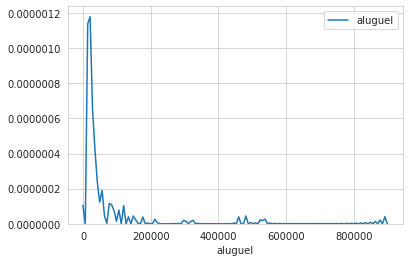

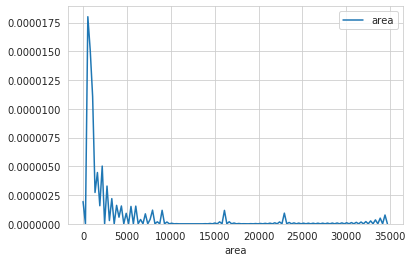

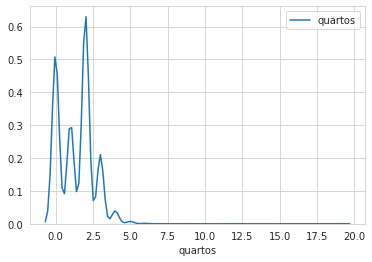

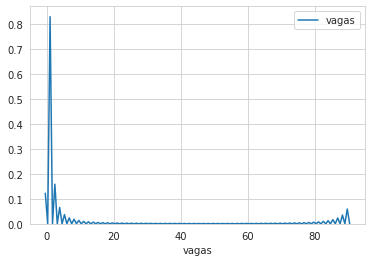

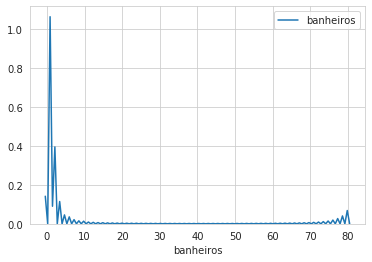

In [ ]:

sns.set_style('whitegrid')
# plot one histogram for each numerical feature
for feature in numerical_features:
    sns.distplot(alugueis[feature], hist=False, label=feature)
    plt.show()




In [ ]:
# for each categorical_features, find the count of '1's:
bairros = []
for feature in categorical_features:
    bairros.append([feature, alugueis[feature].sum()])

# order list by bairros[1] in descending order
bairros.sort(key=lambda x: x[1], reverse=True)
bairros
    



[['bairro_Centro', 808],
 ['bairro_BarradaTijuca', 304],
 ['bairro_Copacabana', 285],
 ['bairro_Tijuca', 280],
 ['bairro_CampoGrande', 228],
 ['bairro_Méier', 196],
 ['bairro_RecreioDosBandeirantes', 153],
 ['bairro_Botafogo', 137],
 ['bairro_VilaIsabel', 121],
 ['bairro_Taquara', 103],
 ['bairro_EngenhoNovo', 99],
 ['bairro_Pechincha', 96],
 ['bairro_Irajá', 90],
 ['bairro_Ipanema', 78],
 ['bairro_SãoCristóvão', 68],
 ['bairro_Cachambi', 64],
 ['bairro_Flamengo', 63],
 ['bairro_Freguesia-Jacarepaguá', 62],
 ['bairro_Jacarepaguá', 58],
 ['bairro_Freguesia', 56],
 ['bairro_Maracanã', 56],
 ['bairro_Leblon', 51],
 ['bairro_Piedade', 51],
 ['bairro_Andaraí', 45],
 ['bairro_Grajaú', 45],
 ['bairro_Penha', 42],
 ['bairro_Laranjeiras', 41],
 ['bairro_Cascadura', 40],
 ['bairro_SantaTeresa', 37],
 ['bairro_Glória', 36],
 ['bairro_PraçaSeca', 36],
 ['bairro_EngenhoDeDentro', 33],
 ['bairro_Bonsucesso', 32],
 ['bairro_Madureira', 32],
 ['bairro_Pilares', 32],
 ['bairro_OswaldoCruz', 31],
 ['bai

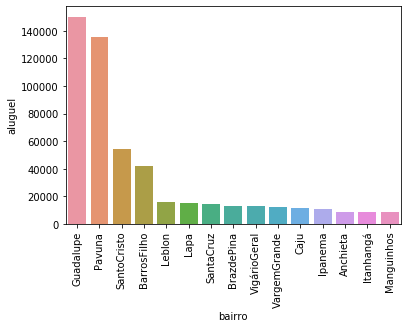

In [ ]:
avg_rents = alugueis.groupby('bairro').mean().reset_index()[['bairro', 'aluguel']]
avg_rents['aluguel'] = [round(r) for r in avg_rents.aluguel]
avg_rents.sort_values(by=['aluguel'], ascending=False, inplace=True)

# plot boxplot for each bairro
sns.barplot(x='bairro', y='aluguel', data=avg_rents.head(15))
# rotate x-axis labels
plt.xticks(rotation=90)
plt.show()

### Os preço medio em bairros acima como Guadalupe, Pavuna e Santo Cristo se justificam por terem muitos imóveis inteiros em aluguel, como galpões e prédios.

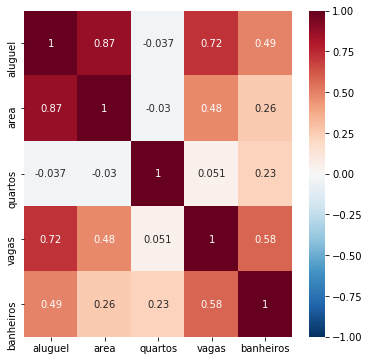

In [ ]:
# correlation matrix
corr = alugueis[numerical_features].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

#### fatores como area, banheiro e vagas aparentam ter um efeito maior no preço do aluguel. Porém sem dúvida o bairro do imóvel também tem um peso.

#### Fiquei curioso em entender como o numero de quartos não se correlaciona com o preço, e irei plotar um gráfico para verificar:

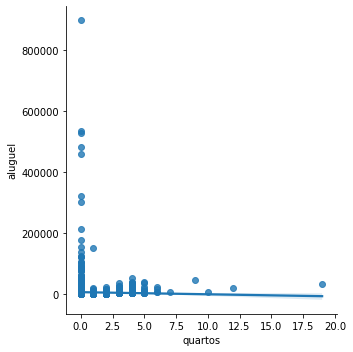

In [ ]:
# See linear regression plot for quartos and aluguel:
sns.lmplot(x='quartos', y='aluguel', data=alugueis)
plt.show()

#### Os galpões parecem de alguma maneira afetar essa variável, penso em remover os imóveis que não possuem nenhum quarto de nossa análise, abaixo considerarei essa opção

In [ ]:
# remove from alugueis all rows with 0 quartos and apply var summary
alugueis_modificada = alugueis[alugueis.quartos != 0]
alugueis_modificada[numerical_features].apply(lambda x: var_summary(x)).T


,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
aluguel,3398.0,0.0,9704186.0,2855.852266,1870.0,4275.660322,1.828127e+07,220.0,700.0,900.0,1010.0,1346.25,1870.0,3000.0,4950.0,7188.95,19924.3,150000.0
area,3398.0,0.0,283923.0,83.555915,65.0,119.856890,1.436567e+04,15.0,25.0,32.0,39.0,50.00,65.0,85.0,128.0,195.00,400.0,5453.0
quartos,3398.0,0.0,6826.0,2.008829,2.0,0.888174,7.888534e-01,1.0,1.0,1.0,1.0,1.00,2.0,2.0,3.0,3.00,4.0,19.0
vagas,3398.0,0.0,2504.0,0.736904,1.0,1.612506,2.600174e+00,0.0,0.0,0.0,0.0,0.00,1.0,1.0,2.0,2.00,4.0,80.0
banheiros,3398.0,0.0,5162.0,1.519129,1.0,0.946657,8.961603e-01,0.0,1.0,1.0,1.0,1.00,1.0,2.0,3.0,3.00,5.0,17.0


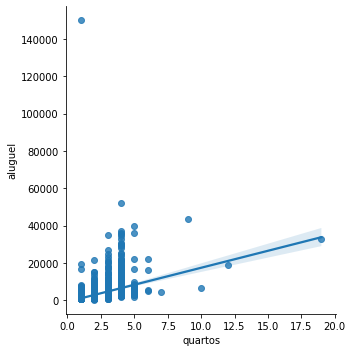

In [ ]:
# See linear regression plot for quartos and aluguel:
sns.lmplot(x='quartos', y='aluguel', data=alugueis_modificada)
plt.show()

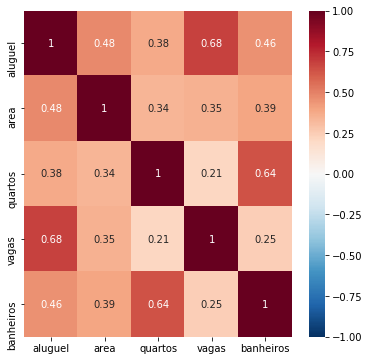

In [ ]:
# correlation matrix
corr = alugueis_modificada[numerical_features].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

#### Como a matriz de correlação aparenta fazer um pouco mais de sentido, criarei o modelo com base em alugueis_modificada

### 3.4 Construção do modelo

In [6]:
# separe os dados em treino e teste
train_set, test_set = train_test_split(alugueis, test_size=0.2, random_state=1)


In [7]:
features = train_set.drop(['bairro'], axis=1).columns.tolist()

# add all models imported above
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

# create a list of model names
model_names = [
    'Logistic Regression',
    'K-Nearest Neighbors',
    'Support Vector Machine',
    'Naive Bayes',
    'Decision Tree',
    'Random Forest'
]

# create a dataframe to store the results
results = pd.DataFrame(columns=['Model', 'Score'])

# loop through the models
for model, name in zip(models, model_names):
    # train the model
    model.fit(train_set[features], train_set['aluguel'])
    # make predictions
    predictions = model.predict(test_set[features])
    # calculate the score
    score = model.score(test_set[features], test_set['aluguel'])
    # store the results
    results = results.append({'Model': name, 'Score': score}, ignore_index=True)

results

/home/joaocardoso/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Model,Score
0,Logistic Regression,0.000000
1,K-Nearest Neighbors,0.331622
2,Support Vector Machine,0.008214
3,Naive Bayes,0.516427
4,Decision Tree,0.554415
5,Random Forest,0.085216


### 3.4 Otimização do modelo

In [8]:
#import gridsearchcv
from sklearn.model_selection import GridSearchCV

# hyperparameter tuning for decision tree classifier:
# create a list of hyperparameters
hyperparameters = {
    'min_samples_leaf': [1, 2, 4, 8, 16, 32, 64],
    'min_samples_split': [2, 5, 10, 15, 20],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, "auto", "sqrt", "log2"],
    'class_weight': [None, 'balanced']

}

def decision_tree_classifier(hyperparameters):
    # create a decision tree classifier
    clf = DecisionTreeClassifier()
    # create a grid search object
    gs = GridSearchCV(clf, hyperparameters, cv=5, n_jobs=-1)
    # fit the data
    gs.fit(train_set[features], train_set['aluguel'])
    # return the grid search object
    return gs

# get results:
gs = decision_tree_classifier(hyperparameters)
print('Best Score is ',gs.best_score_)
print(gs.best_params_, 'are the params')


/home/joaocardoso/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Best Score is  0.554986123531916
{'class_weight': None, 'criterion': 'entropy', 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2} are the params


##### O score acima não reflete a qualidade da previsão, já que considera uma diferença de RS1,00 no valor do aluguel um erro, Abaixo realizo uma análise estatística da comparação entre o valor do aluguel e a previsão

In [33]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


# see the list of predictions in comparison with the test set
predictions = gs.predict(test_set[features])

# create a dataframe to compare predictions with 'aluguel'
compare = pd.DataFrame(test_set['aluguel'])
compare['predictions'] = predictions
compare['error'] = compare['aluguel'] - compare['predictions']
compare['percent_error'] = ((compare['error'] / compare['aluguel'] ) * 100)
compare.apply(lambda x: var_summary(x)).T


,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
aluguel,974.0,0.0,4.577510e+06,4699.702259,1800.0,25029.442606,6.264730e+08,200.000000,614.870000,846.500000,970.300000,1301.0,1800.0,2997.25,5600.000000,9730.500000,35824.29,535308.00
predictions,974.0,0.0,4.171875e+06,4283.239220,1800.0,18325.348675,3.358184e+08,200.000000,617.030000,848.250000,970.000000,1301.0,1800.0,2997.50,5576.000000,9741.350000,36605.30,322000.00
error,974.0,0.0,4.056350e+05,416.463039,0.0,10487.717212,1.099922e+08,-124572.000000,-525.110000,-14.000000,-4.000000,0.0,0.0,0.00,4.000000,11.000000,1284.67,235308.00
percent_error,974.0,0.0,7.218641e+01,0.074113,0.0,4.535247,2.056846e+01,-71.010329,-4.016011,-0.438122,-0.165896,0.0,0.0,0.00,0.178412,0.387031,6.38,55.74


#### A media do erro na previsão é de 0,07%, com desvio padrão de 4.5 pontos percentuais, o que sifnifica que em 95% das previsões o valor do aluguel tem uma diferença de menos de 1% para o valor real de um apartamento nas condições apresentadas